In [307]:
from sklearn.cluster import KMeans
import pandas as pd
from matplotlib import pyplot as plt

In [308]:
df = pd.read_csv(r'C:\Users\shara\OneDrive\Desktop\data-science\data\income.csv')

In [309]:
df

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000
5,Gautam,39,155000
6,David,41,160000
7,Andrea,38,162000
8,Brad,36,156000
9,Angelina,35,130000


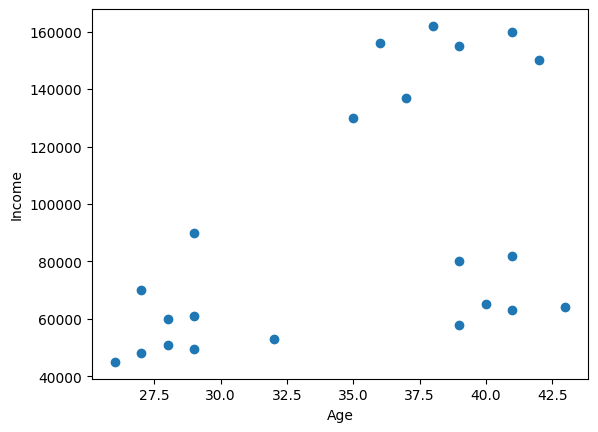

In [310]:
plt.xlabel('Age')
plt.ylabel('Income')
plt.scatter(df['Age'], df['Income($)'])

In [311]:
k_model = KMeans(n_clusters=3)

In [312]:
y_predicted = k_model.fit_predict(df[['Age', 'Income($)']])
df['Prediction'] = y_predicted
df.drop(['Name'], axis=1, inplace=True)
df

,Age,Income($),Prediction
0,27,70000,2
1,29,90000,2
2,29,61000,1
3,28,60000,1
4,42,150000,0
5,39,155000,0
6,41,160000,0
7,38,162000,0
8,36,156000,0
9,35,130000,0


In [313]:
df1 = df[df["Prediction"]==0]
df2 = df[df["Prediction"]==1]
df3 = df[df["Prediction"]==2]

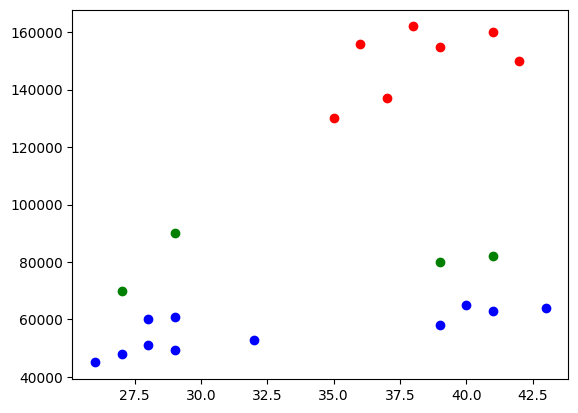

In [314]:
plt.scatter(df1['Age'],df1['Income($)'], c='r')
plt.scatter(df2['Age'],df2['Income($)'], c='b')
plt.scatter(df3['Age'],df3['Income($)'], c='g')


In [315]:
# the clusturing is not so good . Trying normalization
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])
scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])
df



,Age,Income($),Prediction
0,0.058824,0.213675,2
1,0.176471,0.384615,2
2,0.176471,0.136752,1
3,0.117647,0.128205,1
4,0.941176,0.897436,0
5,0.764706,0.940171,0
6,0.882353,0.982906,0
7,0.705882,1.000000,0
8,0.588235,0.948718,0
9,0.529412,0.726496,0


In [316]:
y_predicted = k_model.fit_predict(df[['Age', 'Income($)']])
df['Prediction'] = y_predicted

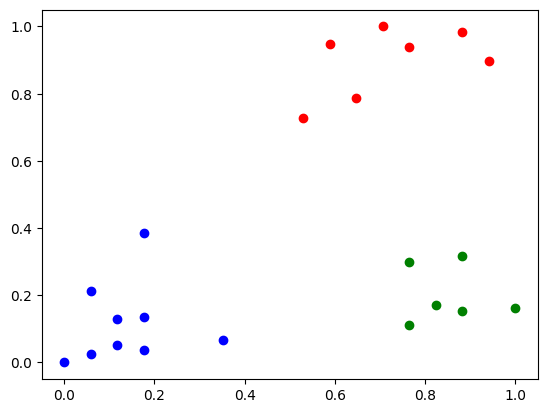

In [317]:
df1 = df[df["Prediction"]==0]
df2 = df[df["Prediction"]==1]
df3 = df[df["Prediction"]==2]
plt.scatter(df1['Age'],df1['Income($)'], c='r')
plt.scatter(df2['Age'],df2['Income($)'], c='b')
plt.scatter(df3['Age'],df3['Income($)'], c='g')

# Exercise

In [318]:
from sklearn.datasets import load_iris

iris = load_iris()
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


Text(0, 0.5, 'petal width (cm)')

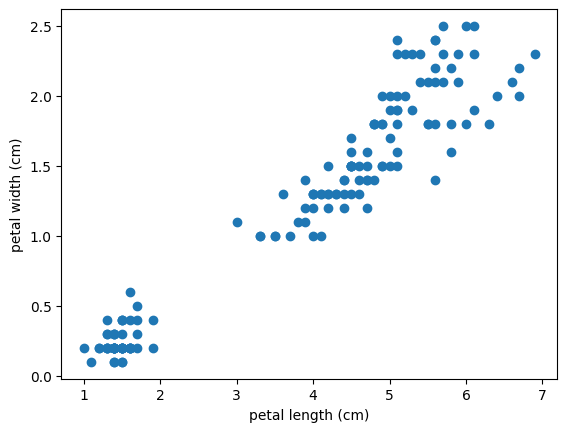

In [319]:
print(iris.feature_names)
df = iris.data
df_filtered = df[:, 2:]
plt.scatter(df_filtered[:, :1], df_filtered[:, 1:])
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')

In [320]:
y_predicted = k_model.fit_predict(df_filtered)

In [321]:
df_filtered = pd.DataFrame(df_filtered, columns=['petal length', "petal width"])
df_filtered["prediction"] = y_predicted
df_filtered
df1 = df_filtered[df_filtered["prediction"]==0]
df2 = df_filtered[df_filtered["prediction"]==1]
df3 = df_filtered[df_filtered["prediction"]==2]

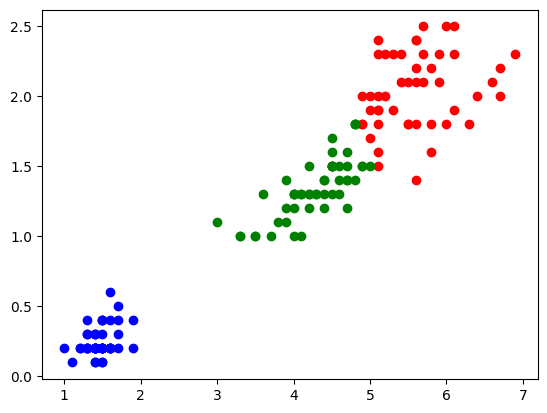

In [322]:
plt.scatter(df1['petal length'],df1['petal width'], c='r')
plt.scatter(df2['petal length'],df2['petal width'], c='b')
plt.scatter(df3['petal length'],df3['petal width'], c='g')

In [323]:
# trying normalization
df_filtered["petal length"] = scaler.fit_transform(df_filtered[['petal length']])
df_filtered["petal width"] = scaler.fit_transform(df_filtered[['petal width']])


In [324]:
df_filtered

,petal length,petal width,prediction
0,0.067797,0.041667,1
1,0.067797,0.041667,1
2,0.050847,0.041667,1
3,0.084746,0.041667,1
4,0.067797,0.041667,1
...,...,...,...
145,0.711864,0.916667,0
146,0.677966,0.750000,0
147,0.711864,0.791667,0
148,0.745763,0.916667,0


In [325]:
y_predicted = k_model.fit_predict(df_filtered.drop(["prediction"], axis=1))
df_filtered["prediction"] = y_predicted
df_filtered

,petal length,petal width,prediction
0,0.067797,0.041667,1
1,0.067797,0.041667,1
2,0.050847,0.041667,1
3,0.084746,0.041667,1
4,0.067797,0.041667,1
...,...,...,...
145,0.711864,0.916667,0
146,0.677966,0.750000,0
147,0.711864,0.791667,0
148,0.745763,0.916667,0


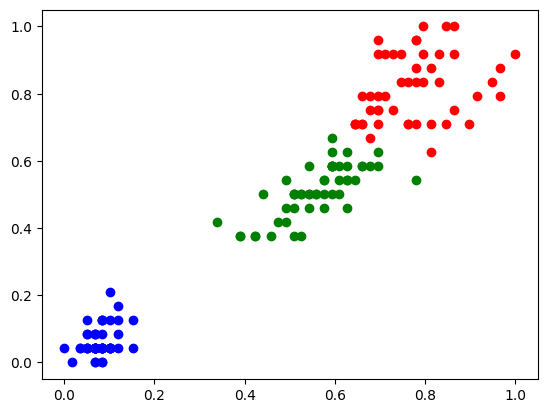

In [326]:
df1 = df_filtered[df_filtered["prediction"]==0]
df2 = df_filtered[df_filtered["prediction"]==1]
df3 = df_filtered[df_filtered["prediction"]==2]
plt.scatter(df1['petal length'],df1['petal width'], c='r')
plt.scatter(df2['petal length'],df2['petal width'], c='b')
plt.scatter(df3['petal length'],df3['petal width'], c='g')

In [327]:
from sklearn.metrics import confusion_matrix
import seaborn as sn

cm = confusion_matrix(y_predicted, iris.target)

Text(95.72222222222221, 0.5, 'Truth')

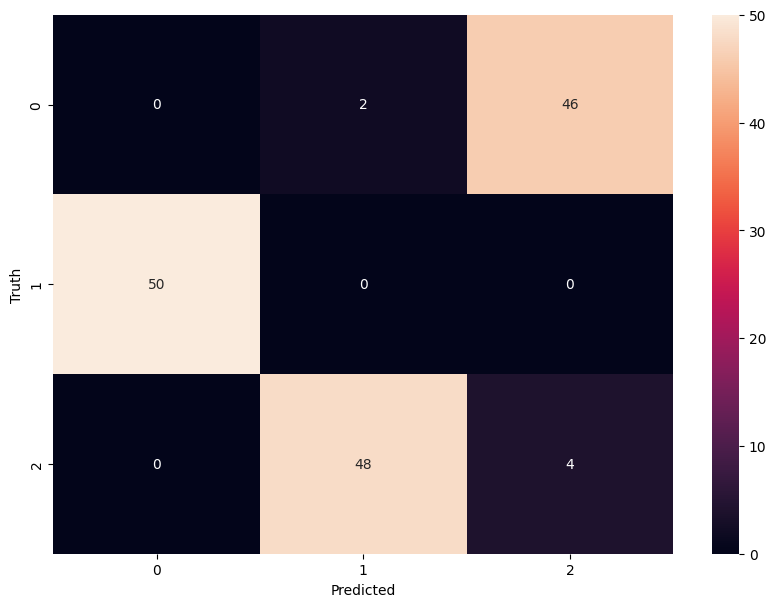

In [328]:
plt.figure(figsize=(10, 7))
sn.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")